In [1]:
# using Pkg
# Pkg.activate("/home/gridsan/mleprovost/julia/InvariantDA.jl")

In [2]:
using Revise
# using InvariantDA
using HierarchicalDA
using LinearAlgebra
using Statistics
using FFTW
using OrdinaryDiffEq

using LaTeXStrings
using ApproxFun
# using Sundials

Precompiling HierarchicalDA
  ✓ HierarchicalDA
  1 dependency successfully precompiled in 7 seconds. 499 already precompiled.


In [3]:
using CairoMakie
using LaTeXStrings

In [10]:
L = 32*π
Nx = 128
params = KDV_Fourier(L, Nx)

LoadError: MethodError: no method matching KDV_Fourier{ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, true, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}, ApproxFunBase.ITransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunFourier.IFourierTransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}, DiffEqArrayOperator{Float64, Diagonal{Float64, Vector{Float64}}, typeof(SciMLOperators.DEFAULT_UPDATE_FUNC)}}(::Float64, ::Int64, ::Float64, ::Vector{Float64}, ::ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, ::ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, true, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}, ::HierarchicalDA.var"#T_mul!#64"{ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, true, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}}, ::HierarchicalDA.var"#T_mul#65"{HierarchicalDA.var"#T_mul!#64"{ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunBase.TransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, true, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}}}, ::ApproxFunBase.ITransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunFourier.IFourierTransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}, ::HierarchicalDA.var"#Tinv_mul!#66"{ApproxFunBase.ITransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunFourier.IFourierTransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}}, ::HierarchicalDA.var"#Tinv_mul#67"{HierarchicalDA.var"#Tinv_mul!#66"{ApproxFunBase.ITransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, false, ApproxFunFourier.IFourierTransformPlan{Float64, ApproxFunBase.SumSpace{Tuple{CosSpace{PeriodicSegment{Float64}, Float64}, SinSpace{PeriodicSegment{Float64}, Float64}}, PeriodicSegment{Float64}, Float64}, FFTW.r2rFFTWPlan{Float64, Vector{Int32}, true, 1, Tuple{Int64}}}}}}, ::BandedMatrices.BandedMatrix{Float64, Matrix{Float64}, Base.OneTo{Int64}}, ::BandedMatrices.BandedMatrix{Float64, Matrix{Float64}, Base.OneTo{Int64}}, ::DiffEqArrayOperator{Float64, Diagonal{Float64, Vector{Float64}}, typeof(SciMLOperators.DEFAULT_UPDATE_FUNC)}, ::Vector{Float64}, ::Vector{Float64})

[0mClosest candidates are:
[0m  (::Type{KDV_Fourier{Q, R, S, U}} where {Q, R, S, U})(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m)
[0m[90m   @[39m [35mHierarchicalDA[39m [90m~/Documents/HierarchicalDA.jl/src/kdv/[39m[90m[4mkdv.jl:4[24m[39m


In [9]:
Interval(0, 1)

0 .. 1

In [12]:
Domain(0, 1)

LoadError: MethodError: no method matching Domain(::Int64, ::Int64)

[0mClosest candidates are:
[0m  Domain(::Any)
[0m[90m   @[39m [36mDomainSets[39m [90m~/.julia/packages/DomainSets/k2QQI/src/generic/[39m[90m[4mdomain.jl:3[24m[39m


In [4]:
û0 = params.T*map(xi-> 1 + cos(xi/16)*(1  + sin(xi/16)), params.grid)

128-element Vector{Float64}:
  1.0
  7.097484676777727e-17
  1.0
  0.5
 -1.2923689896027213e-16
  2.6844450859613586e-17
 -1.4755982700143775e-17
  5.354059384007026e-17
 -2.910360263972757e-17
  1.4852007435725058e-17
 -1.7643977592036664e-17
  6.996441508677216e-17
  7.593825723433463e-18
  ⋮
  1.5465668206895138e-17
  9.381252918439955e-18
 -2.131651576938061e-17
  2.7129677916893907e-18
  3.742272835705726e-17
  2.013383555664992e-17
  9.997441968293491e-18
 -0.0
  1.3010426069826053e-17
  1.883539223248618e-18
  0.0
 -0.0

In [ ]:
# prob = SplitODEProblem(split_ks, û0, (0.0,0.2), params)#; linsolve = KrylovJL())

In [31]:
prob = SplitODEProblem(params.mD3, spectral_kdv!, û0, (0.0,5.0), params)#; linsolve = KrylovJL())

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 128-element Vector{Float64}:
  1.0
  7.097484676777727e-17
  1.0
  0.5
 -1.2923689896027213e-16
  2.6844450859613586e-17
 -1.4755982700143775e-17
  5.354059384007026e-17
 -2.910360263972757e-17
  1.4852007435725058e-17
 -1.7643977592036664e-17
  6.996441508677216e-17
  7.593825723433463e-18
  ⋮
  1.5465668206895138e-17
  9.381252918439955e-18
 -2.131651576938061e-17
  2.7129677916893907e-18
  3.742272835705726e-17
  2.013383555664992e-17
  9.997441968293491e-18
 -0.0
  1.3010426069826053e-17
  1.883539223248618e-18
  0.0
 -0.0

In [32]:
@time sol  = solve(prob, ETDRK4(), dt = 0.001);

  2.195308 seconds (23.23 k allocations: 16.361 MiB)


In [33]:
# @time sol  = solve(prob, ARKODE(Sundials.Implicit(), order=4))# linear_solver=:Band, jac_upper=0, jac_lower=0))#, dt = 0.05)

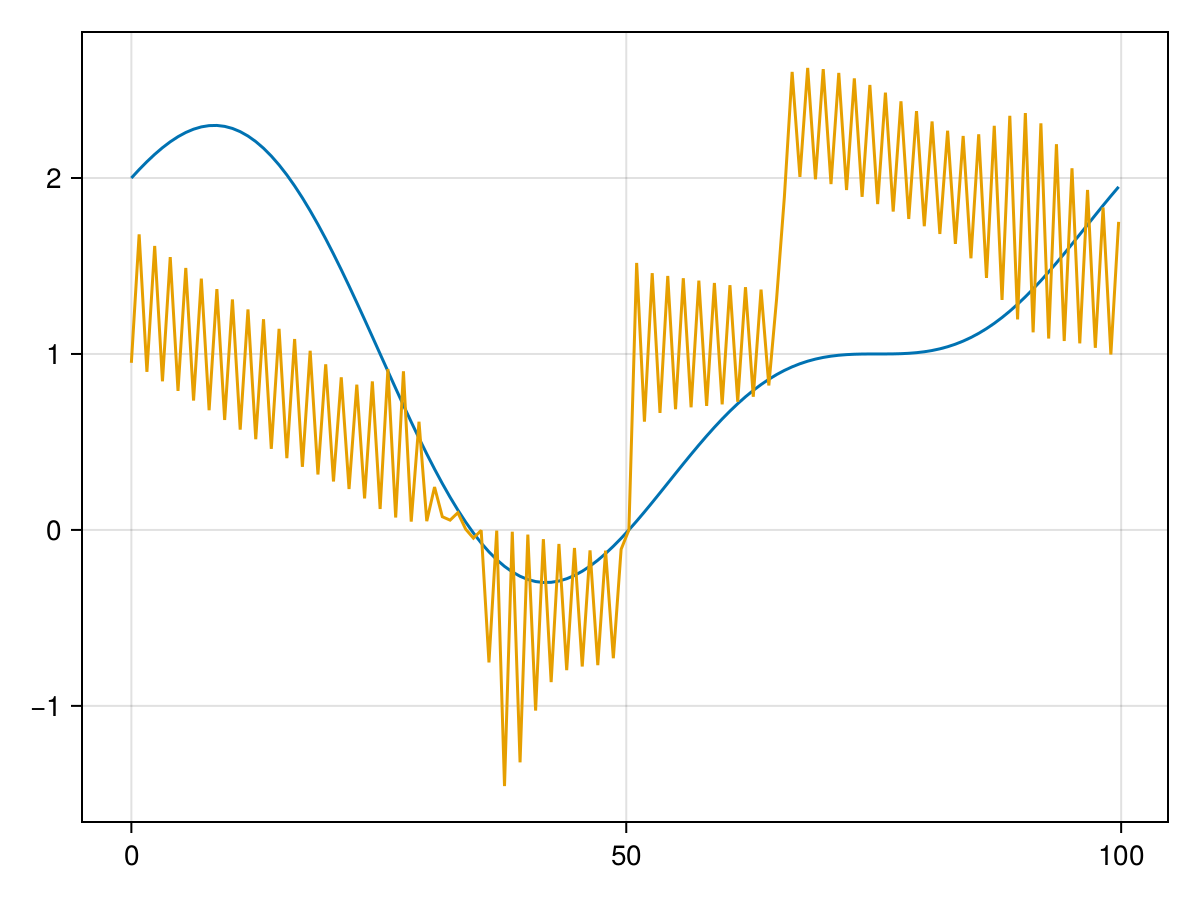

In [36]:
fig = Figure()
ax = Axis(fig[1,1])

lines!(ax, params.grid, params.Tinv*sol(0))
lines!(ax, params.grid, params.Tinv*sol(3.0))
  
resize_to_layout!(fig)
fig

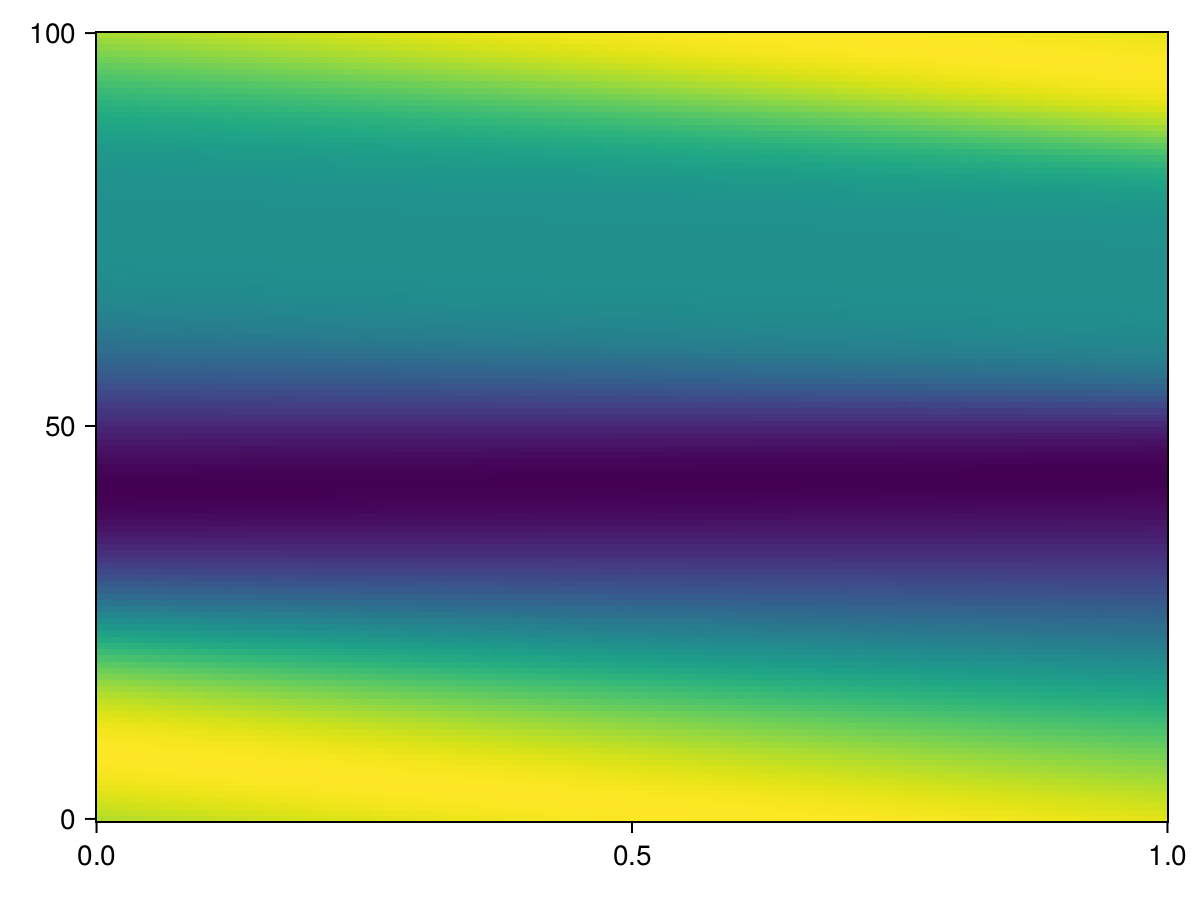

In [30]:
heatmap(sol.t[1:end], params.grid, hcat(map(ui-> params.Tinv*ui, sol.u[1:end])...)')

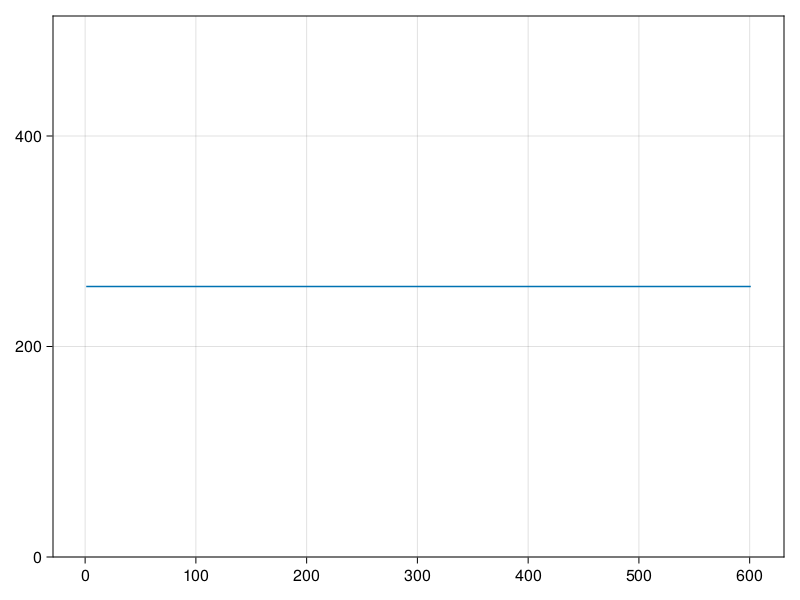

In [18]:
lines(map(ui-> sum(params.Tinv*ui), sol.u[1:10:end]))